In [128]:
import numpy as np
import pandas as pd
import seaborn as sb
import seaborn as sb
import seaborn as sns

import matplotlib.pyplot as plt
sb.set()


In [129]:
sleepdata = pd.read_csv("sleepdisorder-filtered.csv")
Dsteps = pd.DataFrame(sleepdata["Daily Steps"])
Qsleep = pd.DataFrame(sleepdata["Quality of Sleep"])
Sduration = pd.DataFrame(sleepdata["Sleep Duration"])
age = pd.DataFrame(sleepdata["Age"])
Hrate = pd.DataFrame(sleepdata["Heart Rate"])

Model Selection Rationale: Linear Regression was chosen for its simplicity and interpretability. Random Forest Regression was selected for its ability to model nonlinear relationships and interactions between features. OLS Regression was included for its statistical inferences about the significance of predictors.

Model Implementation: The dataset was split into an 80:20 ratio for training and testing. Each model was trained on the same training set, and their performances were evaluated on the test set using metrics such as R² and RMSE (Root Mean Square Error).

# Model 1: Linear Regression

#### Create appropriate datasets for Train and Test in an 80:20 ratio and fit a Linear Regression model on the Train

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Dsteps_Train, Dsteps_Test, Qsleep_Train, Qsleep_Test, Sduration_Train, Sduration_Test, age_Train, age_Test, Hrate_Train, Hrate_Test = train_test_split(Dsteps, Qsleep, Sduration, age, Hrate, test_size = 0.20)


## 1. Relationship between the number of Daily Steps and the Quality Of Sleep.



#### The scatter plot visualizes this relationship for the training data and the linear regression prediction, with the actual data points in blue and the predictions in red.

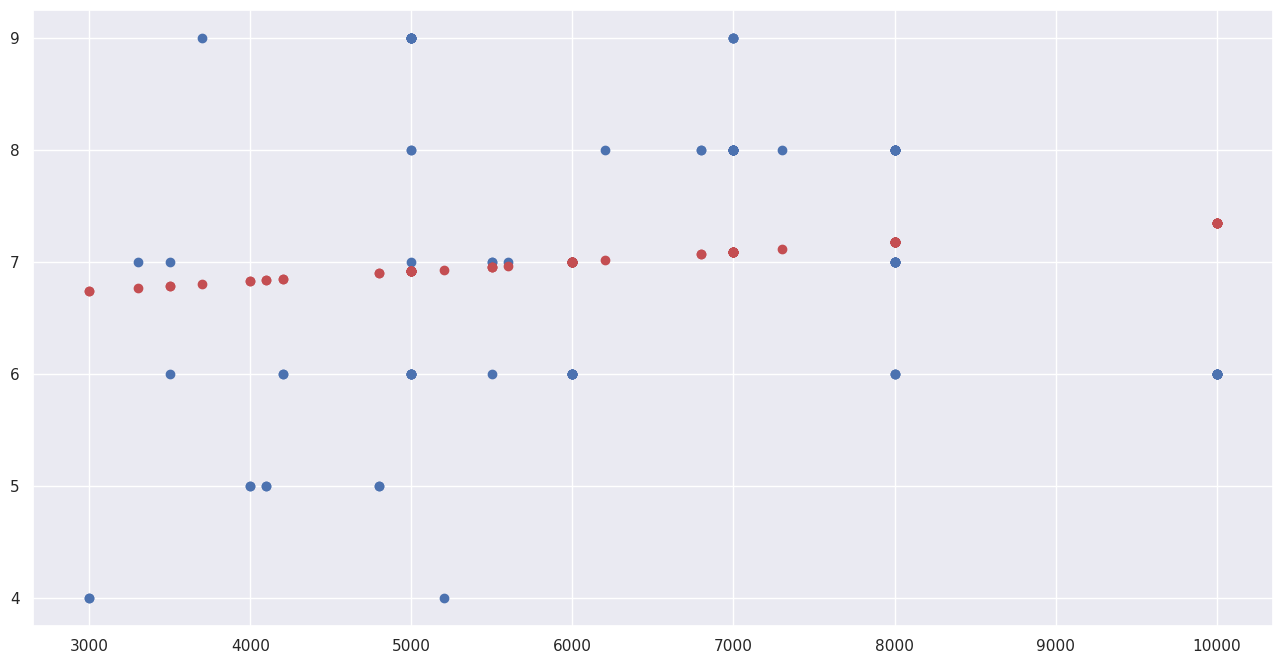

In [138]:
linreg = LinearRegression()       
linreg.fit(Dsteps_Train, Qsleep_Train)      

Qsleep_Train_Pred=linreg.predict(Dsteps_Train)
Qsleep_Test_Pred=linreg.predict(Dsteps_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(Dsteps_Train,Qsleep_Train)
plt.scatter(Dsteps_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [139]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Dsteps_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Dsteps_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error( Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.014340794324838257
Mean Squared Error (MSE) 	: 1.583269573745031

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.07542457183457252
Mean Squared Error (MSE) 	: 1.673589718298773



#### Conclusion: 
Daily Steps is a poor predictor for the quality of sleep. The negative R^2 value on the test set suggests the model performs worse than a horizontal line mean predictor.

## 2. Relationship between the Sleep Duration and the Quality Of Sleep.



#### The scatter plot visualizes this relationship for the training data and the linear regression prediction, with the actual data points in blue and the predictions in red.

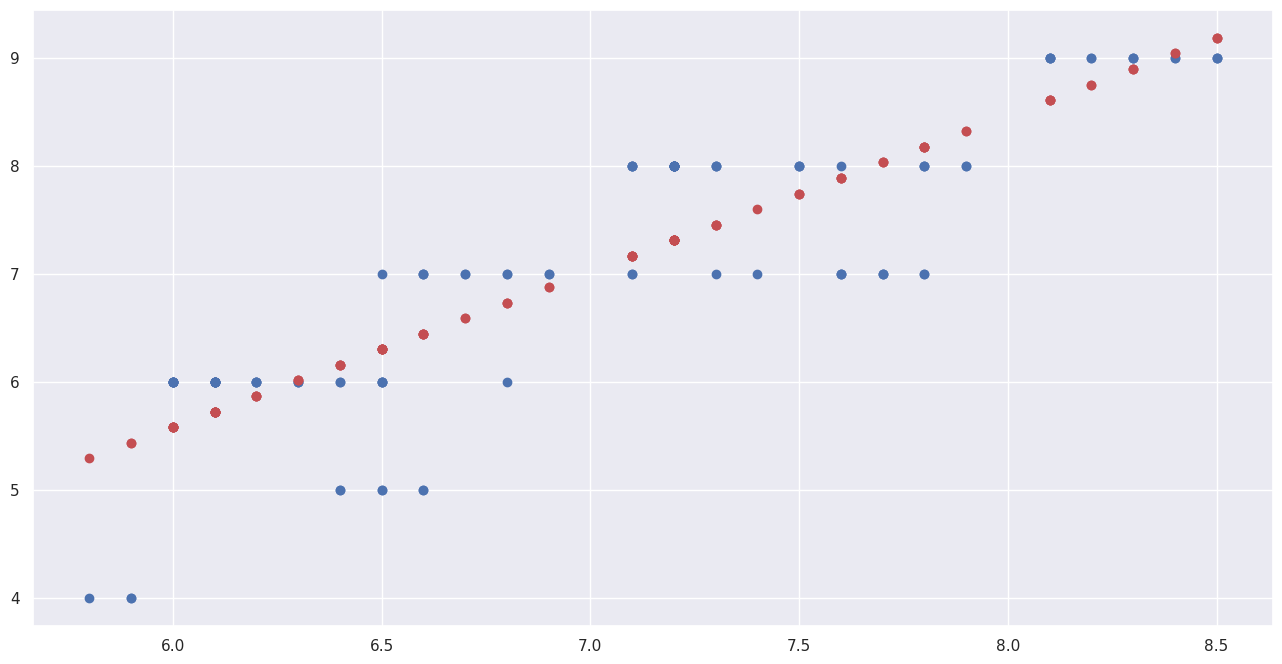

In [146]:
linreg.fit(Sduration_Train, Qsleep_Train)
Qsleep_Train_Pred=linreg.predict(Sduration_Train)
Qsleep_Test_Pred=linreg.predict(Sduration_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(Sduration_Train,Qsleep_Train)
plt.scatter(Sduration_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [147]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Sduration_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Sduration_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.7551692958801199
Mean Squared Error (MSE) 	: 0.3932728496012529

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.7176549128386616
Mean Squared Error (MSE) 	: 0.4393891001386509



#### Conclusion: 

Sleep Duration has a strong positive relationship with the quality of sleep, with a significant portion of the variance explained in both training and testing datasets. It is the best predictor among the four based on the provided metrics.

## 3. Relationship between the Age and the Quality Of Sleep.



#### The scatter plot visualizes this relationship for the training data and the linear regression prediction, with the actual data points in blue and the predictions in red.

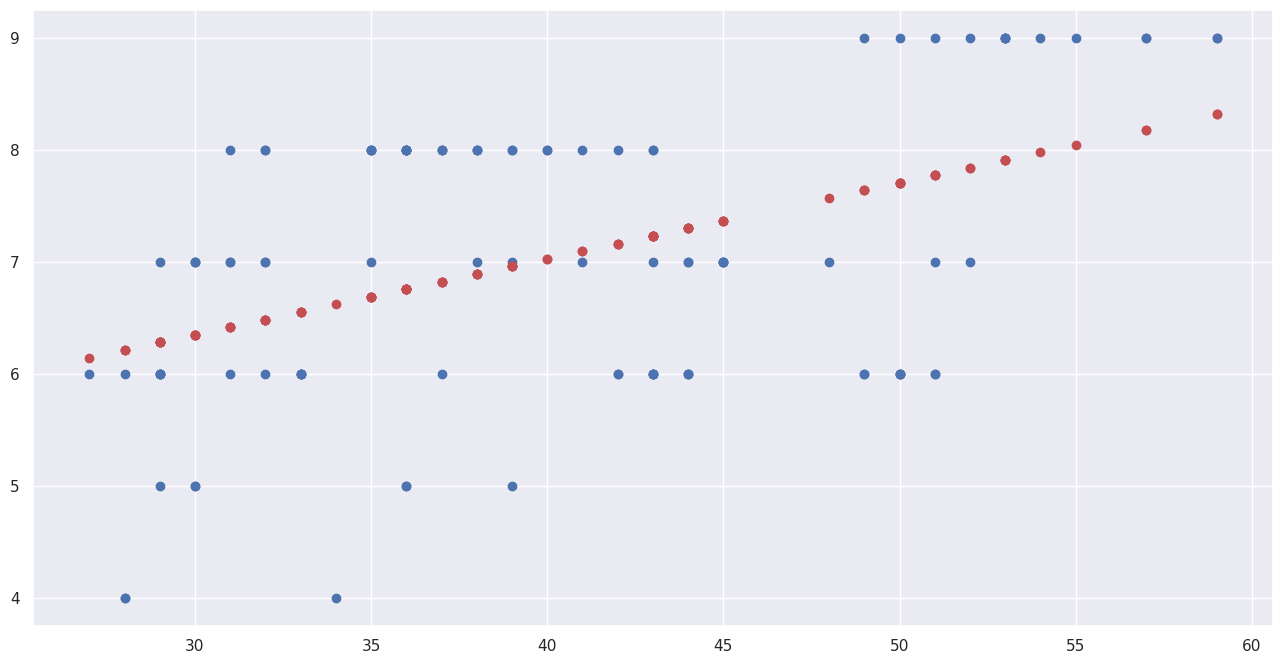

In [152]:
linreg.fit(age_Train, Qsleep_Train)
Qsleep_Train_Pred=linreg.predict(age_Train)
Qsleep_Test_Pred=linreg.predict(age_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(age_Train,Qsleep_Train)
plt.scatter(age_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [153]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(age_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(age_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.20340393744680796
Mean Squared Error (MSE) 	: 1.2795764511138934

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.31530996483505147
Mean Squared Error (MSE) 	: 1.0655235458484111



#### Conclusion: 

Age has a weak relationship with the quality of sleep. It explains a smaller portion of the variance in the training data and performs poorly on the test data, with a negative R^2 value. The model based on Age is likely not reliable for predicting sleep quality and may not generalize well beyond the training data.

## 4. Relationship between the Heart Rate and the Quality Of Sleep.



#### The scatter plot visualizes this relationship for the training data and the linear regression prediction, with the actual data points in blue and the predictions in red.

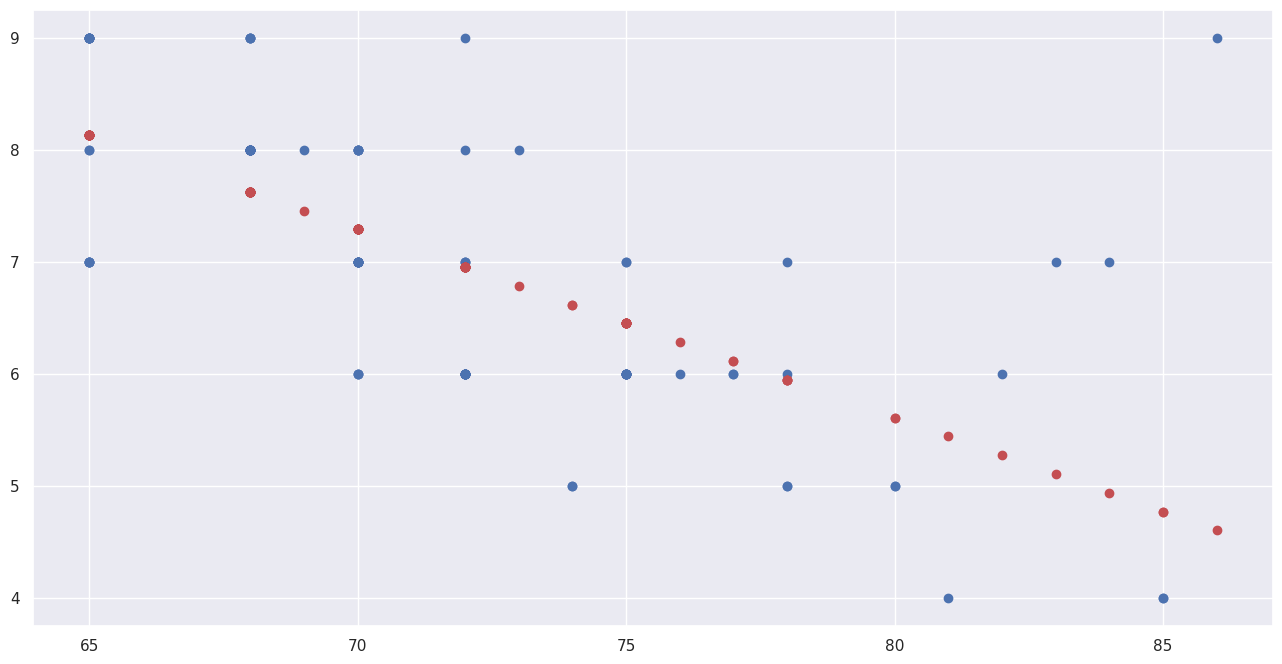

In [158]:
linreg.fit(Hrate_Train, Qsleep_Train)
Qsleep_Train_Pred=linreg.predict(Hrate_Train)
Qsleep_Test_Pred=linreg.predict(Hrate_Test)

f=plt.figure(figsize=(16,8))
plt.scatter(Hrate_Train,Qsleep_Train)
plt.scatter(Hrate_Train, Qsleep_Train_Pred, color='r')
plt.show()

In [159]:
#goodness of fit (train data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Hrate_Train, Qsleep_Train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Train, Qsleep_Train_Pred ))
print()
#goodness of fit (test data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(Hrate_Test,  Qsleep_Test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(Qsleep_Test,  Qsleep_Test_Pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.43880055985869004
Mean Squared Error (MSE) 	: 0.901457616651439

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.36516892796523304
Mean Squared Error (MSE) 	: 0.9879323783736316



#### Conclusion: 

 Heart Rate shows a moderate relationship with the quality of sleep in the training set, explaining approximately 46.77% of the variance. However, the relationship is weaker in the test set, with a lower R^2 value, indicating less predictive power. Despite this, the positive R^2 on the test set suggests that heart rate can still provide some insights into sleep quality, albeit with less accuracy.

## Comparisons
1. Sleep Duration has the highest R^2 values and the lowest MSE for both the training and testing datasets. It is the most significant predictor of sleep quality.
   2. 
Heart Rate follows as the second-best predictor, with moderate R^2 and MSE values on the training set, but less predictive power on the test setty.

3. Age has a positive but lower R^2 on the training set and a negative R^2 on the test set, suggesting it does not generalize well and is likely not a reliable predictor on its own.

4. Daily Steps has the least predictive power, with a very low R^2 on the training set and a negative R^2 on the test set, indicating that it is not a good predictor for sleep quality.

# Model 2: Random Forest Regression

Mean Squared Error: 0.14001538461538462


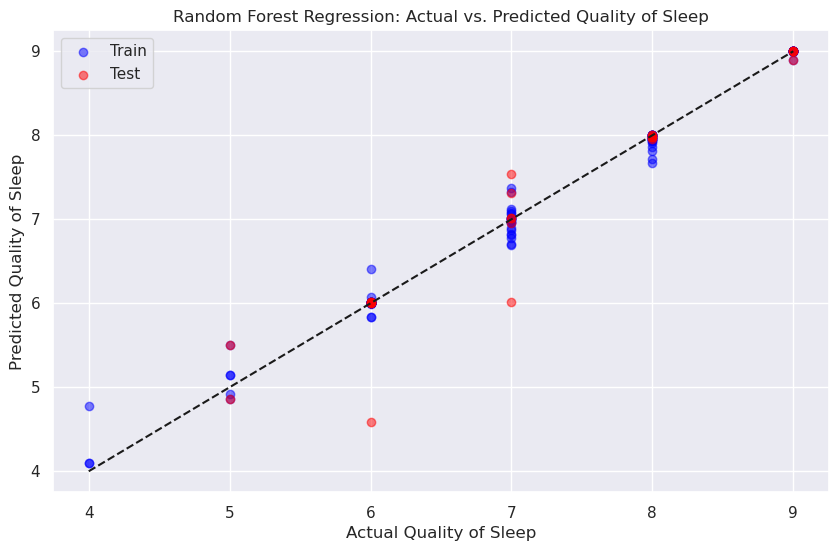

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming sleep_data is your DataFrame with all the data
# and 'Quality of Sleep' is the target variable
X = sleepdata[['Sleep Duration', 'Heart Rate', 'Daily Steps', 'Age']]
y = sleepdata['Quality of Sleep']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Initialize the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Fit the model to the training data
rf_regressor.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_regressor.predict(X_train)
y_pred_test = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error:", mse)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_pred_train, label='Train', color='blue', alpha=0.5)
plt.scatter(y_test, y_pred_test, label='Test', color='red', alpha=0.5)
plt.title('Random Forest Regression: Actual vs. Predicted Quality of Sleep')
plt.xlabel('Actual Quality of Sleep')
plt.ylabel('Predicted Quality of Sleep')
plt.legend()
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.show()


#### Conclusion: 

The Random Forest Regression compares the Actual Quality of Sleep to the predicted quality of sleep, where Blue dots represent the training data predictions, and red dots represent the test data predictions.
The dashed line represents the line of perfect prediction, where the predicted values match the actual values.
The blue and red dots are generally close to the line of perfect prediction, suggesting that the model has good predictive performance.


# Model 3 OLS Linear Regression

In [169]:
import statsmodels.api as sm
y = sleepdata['Quality of Sleep']
X = sleepdata[[ "Sleep Duration", "Age", "Heart Rate", "Daily Steps"]]
X = sm.add_constant(X)

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We now define an OLS linear regression model and fit it to the training split:

In [175]:
model = sm.OLS(y_train,X_train)
results = model.fit()


In [176]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Quality of Sleep   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     160.6
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           7.14e-42
Time:                        10:25:11   Log-Likelihood:                -66.539
No. Observations:                 102   AIC:                             143.1
Df Residuals:                      97   BIC:                             156.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.1137      1.332      3.089      0.003       1.471       6.757
Sleep Duration     1.0768      0.076     14.122      0.000       0.925       1.228
Age                0.0241      0.006      4.250      0.000       0.013       0.035
Heart Rate        -0.0816      0.012     -6.623      0.000      -0.106      -0.057
Daily Steps      3.45e-05   2.89e-05      1.195      0.235   -2.28e-05    9.18e-05
==============================================================================
Omnibus:                        2.624   Durbin-Watson:                   2.314
Prob(Omnibus):                  0.269   Jarque-Bera (JB):                2.355
Skew:                          -0.276   Prob(JB):                        0.308
Kurtosis:                       2.501   Cond. No.                     1.93e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A first warning bell is suggested in the notes, where a large condition number of  1.93e+05 indicates a strong multicollinerity among our predictors. This can be justified by the fact that we use all the available predictors in our model. We can try to remove one or more predictors to reduce multicollinerity.

From our data, p-values of Sleep Duration, Age and Heart Rate are 0.00, which are statistically significant,(typically, a p-value less than 0.05 is considered significant). 
Daily steps however, has p-value of 0.235, which is not statistically significant at the 0.05 level.

We have high R-squared and Adjusted R-squared values, which somehow indicate we are on the right track to predict our factor with a good approximation.

In [221]:
y = sleepdata['Quality of Sleep']
X = sleepdata[[ "Sleep Duration", "Age", "Heart Rate"]]
X = sm.add_constant(X)

In [223]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [224]:
model = sm.OLS(y_train,X_train)
results = model.fit()

In [227]:
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Quality of Sleep   R-squared:                       0.867
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     212.7
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           9.10e-43
Time:                        10:40:49   Log-Likelihood:                -67.284
No. Observations:                 102   AIC:                             142.6
Df Residuals:                      98   BIC:                             153.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.7870      1.209      3.959      0.000       2.387       7.187
Sleep Duration     1.0555      0.074     14.206      0.000       0.908       1.203
Age                0.0248      0.006      4.388      0.000       0.014       0.036
Heart Rate        -0.0862      0.012     -7.338      0.000      -0.109      -0.063
==============================================================================
Omnibus:                        3.581   Durbin-Watson:                   2.262
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                2.911
Skew:                          -0.297   Prob(JB):                        0.233
Kurtosis:                       2.423   Cond. No.                     2.12e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Although the p-values of the regression coefficients are all below the significance threshold α = 0.05, there is still a strong multicollinearty among the predictors. Let's try without Heart Rate so to keep Sleep Duration and Age, the most relevant factors from the previous exploratory and statistical analysis

In [231]:
y = sleepdata['Quality of Sleep']
X = sleepdata[[ "Sleep Duration", "Age"]]
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = sm.OLS(y_train,X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Quality of Sleep   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     171.2
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           1.03e-30
Time:                        10:43:14   Log-Likelihood:                -76.750
No. Observations:                  89   AIC:                             159.5
Df Residuals:                      86   BIC:                             167.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -3.4773      0.576     -6.032      0.000      -4.623      -2.331
Sleep Duration     1.3362      0.082     16.242      0.000       1.173       1.500
Age                0.0290      0.007      4.008      0.000       0.015       0.043
==============================================================================
Omnibus:                        3.583   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.167   Jarque-Bera (JB):                3.117
Skew:                          -0.363   Prob(JB):                        0.210
Kurtosis:                       2.440   Cond. No.                         403.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now the model seems to fit correctly.

Now, let's use the MAE (Mean Absolute Error) to assess the accuracy of the training model. We can benchmark it against the average of the target variable  
¯¯¯
y
 , since we don't want our model to perform worse than that.

Let's print out the MAE of the naïve benchmark model (the mean of the target variable) and that of the training model:

In [234]:
def mae(y, pred): 
    return round(np.mean(np.abs(y - pred)), 2)

In [236]:
pred_train = results.predict(X_train)

print('Naïve Training MAE:', mae(y_train, np.mean(y_train))) #naive mae
print('Training MAE:', mae(y_train, pred_train)) # mae

Naïve Training MAE: 1.07
Training MAE: 0.46


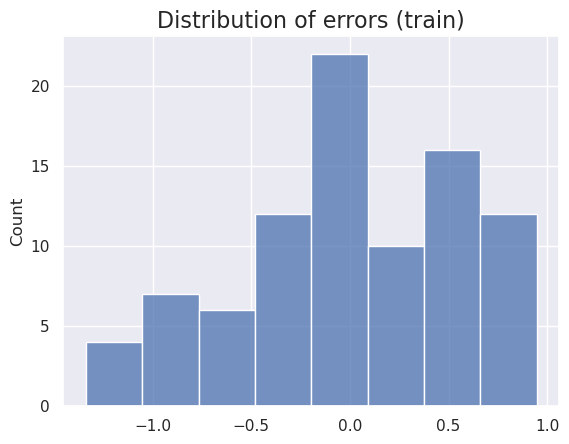

In [238]:
sns.histplot(y_train - pred_train).set_title("Distribution of errors (train)", size=16)
plt.show()

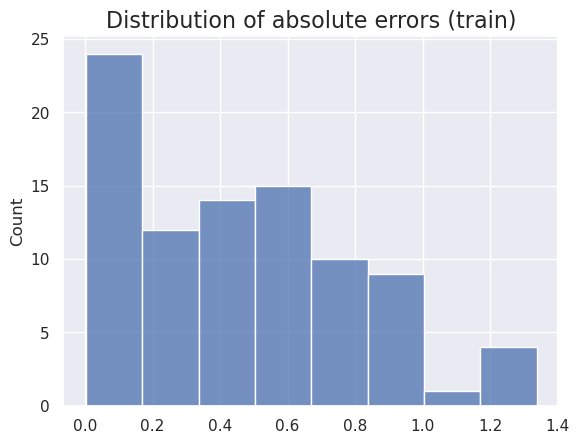

In [240]:
sns.histplot(np.abs(y_train - pred_train)).set_title("Distribution of absolute errors (train)", size=16)
plt.show()

So far, we have trained a regression model on the training dataset. The next step is to test its accuracy on the test dataset. To do this, we use the predictors from the test set X_test to make predictions with the model we just trained, and then compare these to the observed responses in y_test.

Finally, we can print out the MAE of the naïve benchmark model (the mean of the target variable) and that of the testing model:

In [243]:
pred_test = results.predict(X_test)

print('Naïve Testing MAE:', mae(y_test, np.mean(y_test))) #naive mae
print('Testing MAE:', mae(y_test, pred_test)) # mae

Naïve Testing MAE: 1.07
Testing MAE: 0.49


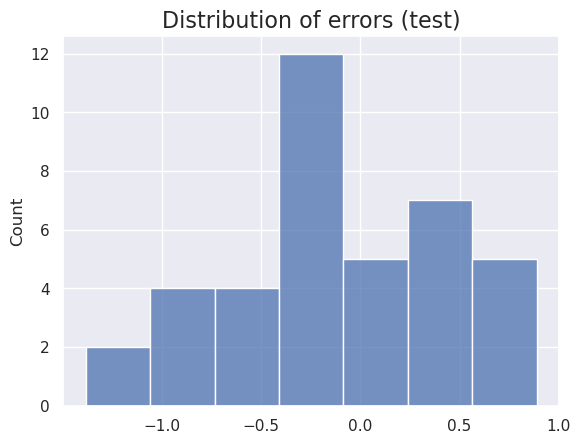

In [245]:
sns.histplot(y_test - pred_test).set_title("Distribution of errors (test)", size=16)
plt.show()

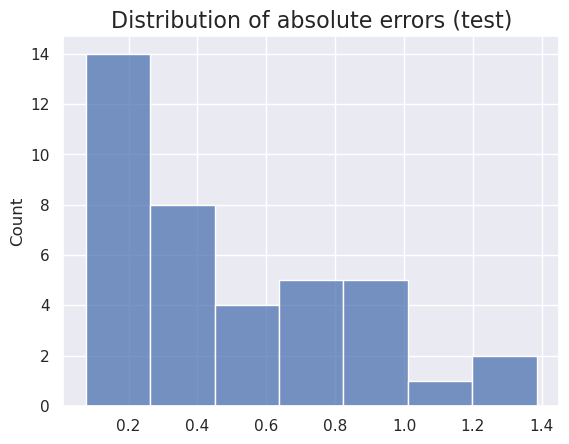

In [247]:
sns.histplot(np.abs(y_test - pred_test)).set_title("Distribution of absolute errors (test)", size=16)
plt.show()

Comparing the training and testing MAE results, we can conclude that the model doesn't overfit the data. In fact, the Mean Absolute Errors between the two models are quite similar. In case of overfitting, we would have observed a larger and more evident discrepancy between the training and testing performance, with larger errors specifically in the testing predictions.